In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import sklearn
%matplotlib inline

In [3]:
# Importing required packages for visualization
from IPython.display import Image  
# from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [5]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [7]:
df.shape


(270, 5)

In [8]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [10]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [11]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [12]:
X

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [13]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print("TRAIN X SHAPE:",X_train.shape)
print("TRAIN Y SHAPE:",y_train.shape)
print("VALUE COUNTS:\n",y_train.value_counts())
print("TEST X SHAPE :",X_test.shape)
print("TEST Y SHAPE :",y_test.shape)

TRAIN X SHAPE: (189, 4)
TRAIN Y SHAPE: (189,)
VALUE COUNTS:
 heart disease
0    101
1     88
Name: count, dtype: int64
TEST X SHAPE : (81, 4)
TEST Y SHAPE : (81,)


#### Evaluating model performance

Creating helper functions to evaluate model performance and help plot the decision tree

In [17]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Healthy', "Heart Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [20]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [21]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
gph = get_dt_graph(dt_default)


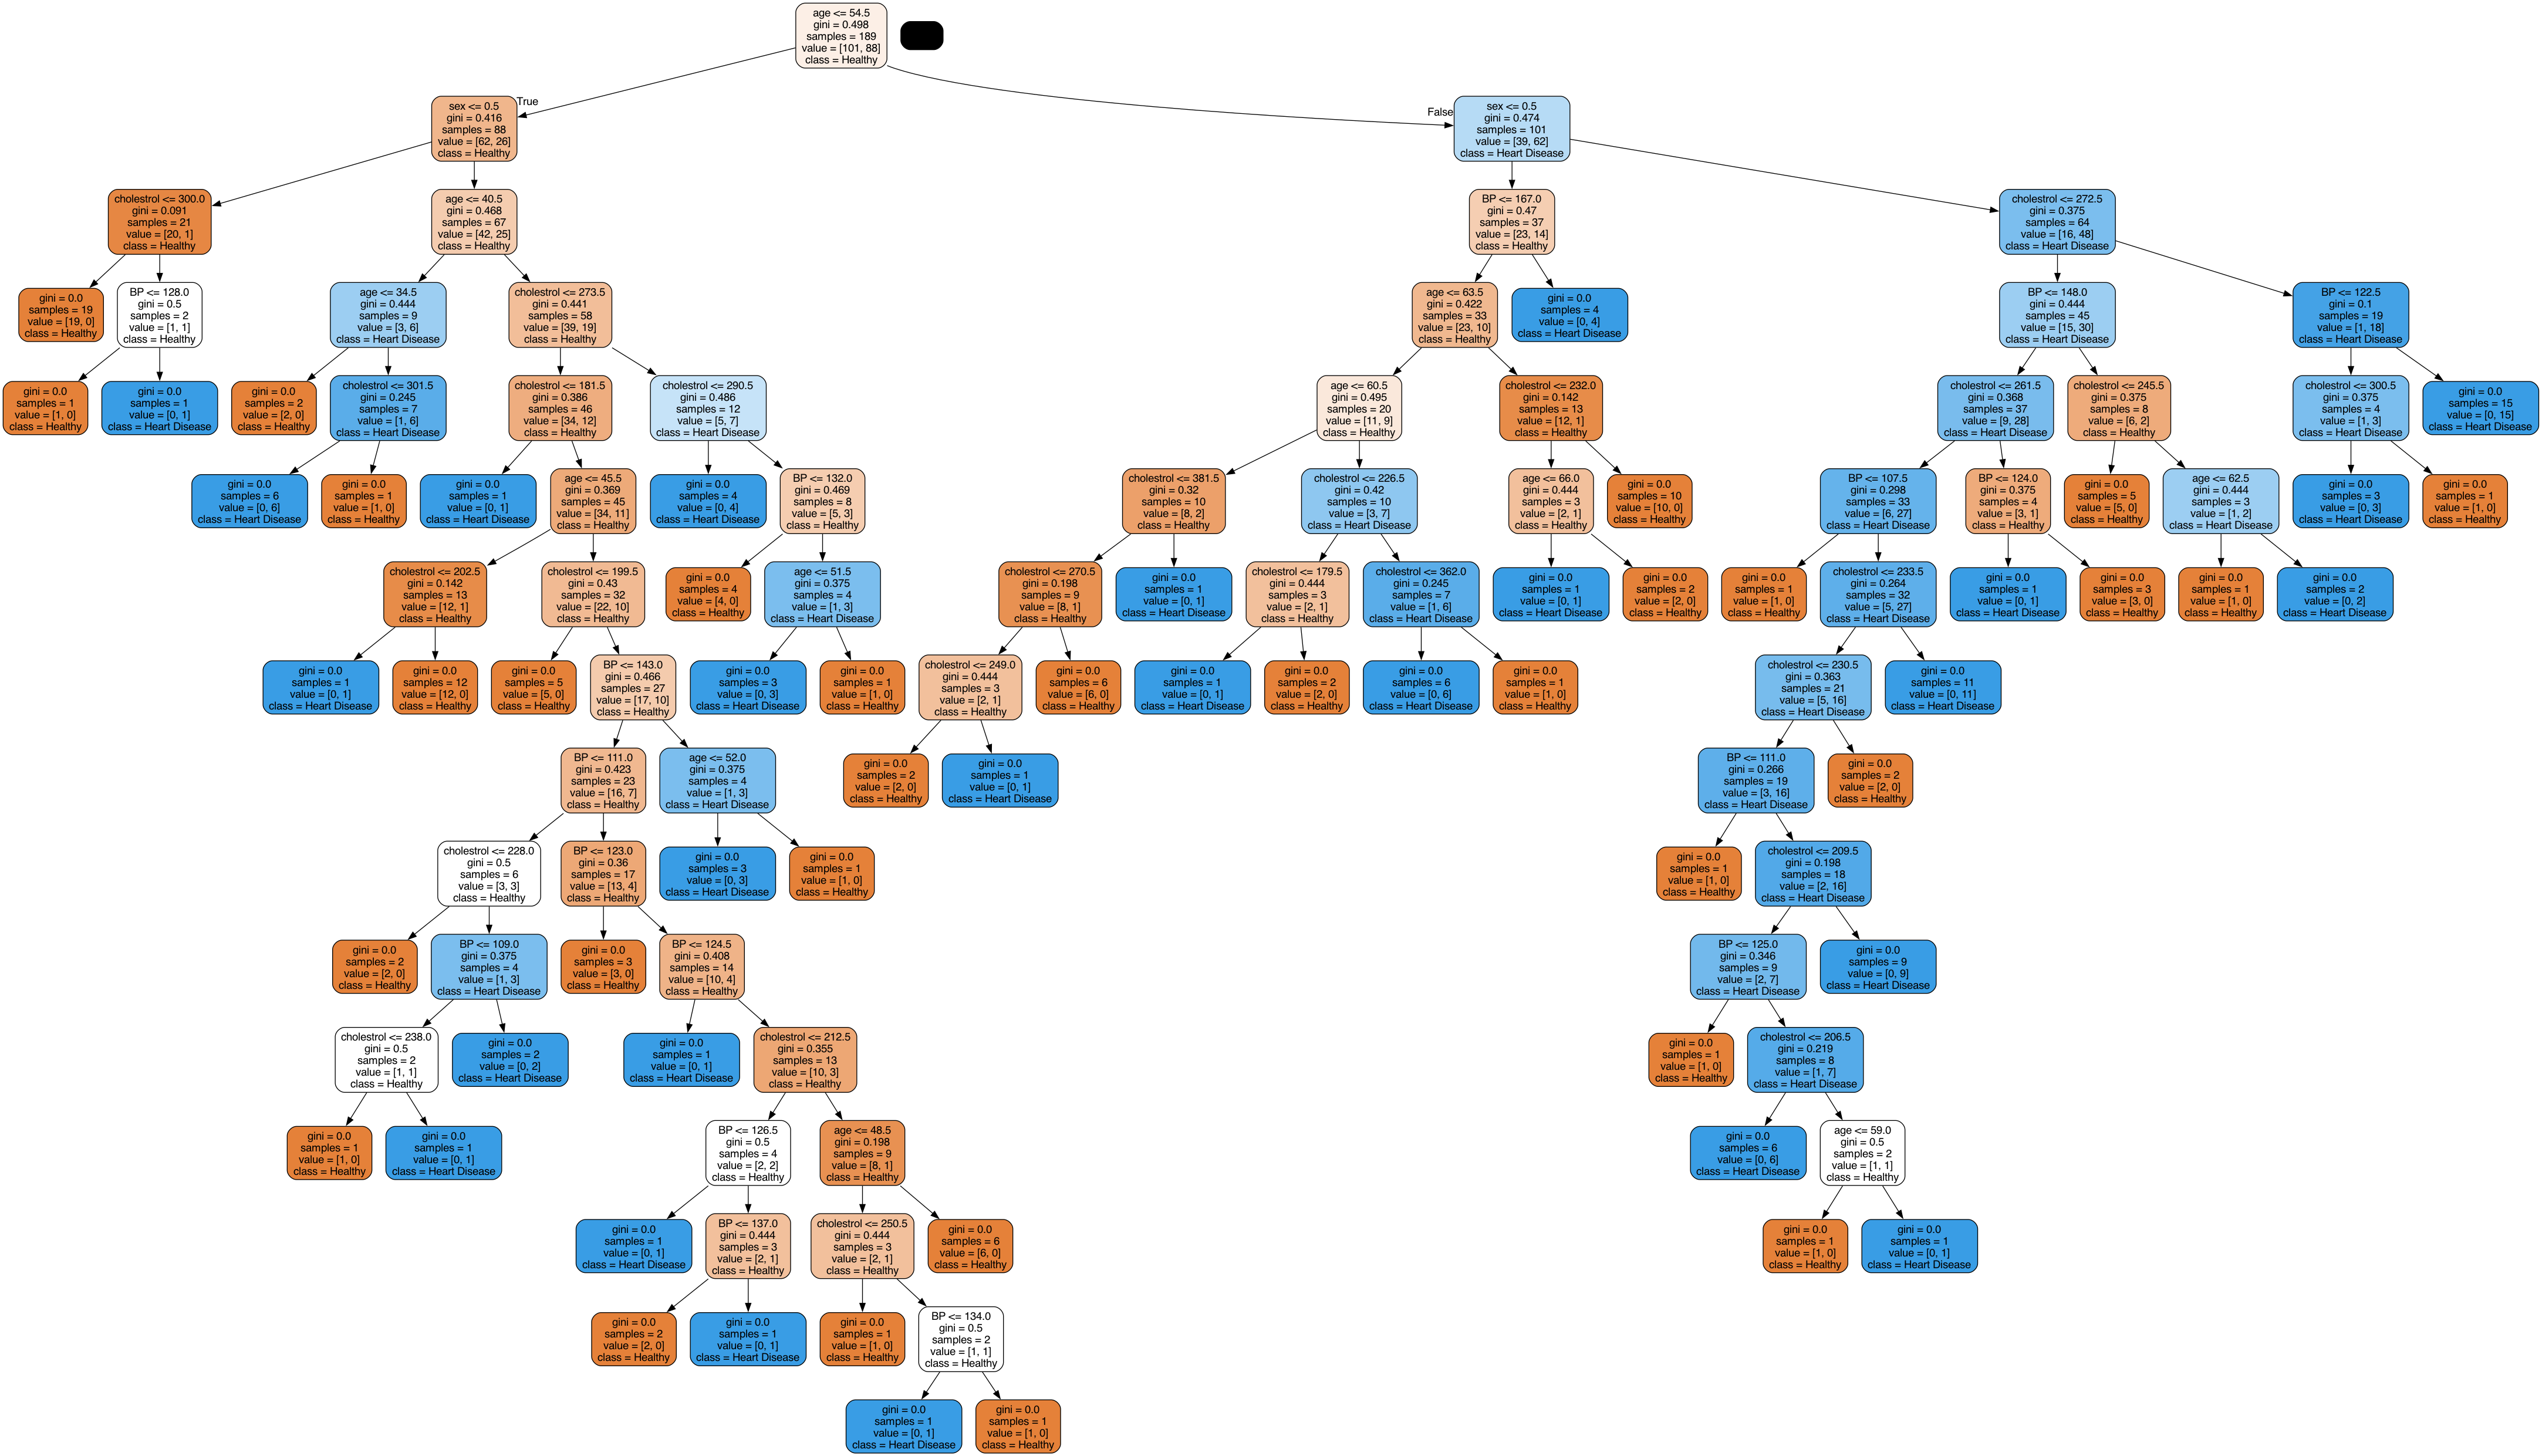

In [23]:
Image(gph.create_png())

In [24]:
with open('temp.png', 'wb') as f:
    f.write(gph.create_png())

In [25]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [26]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

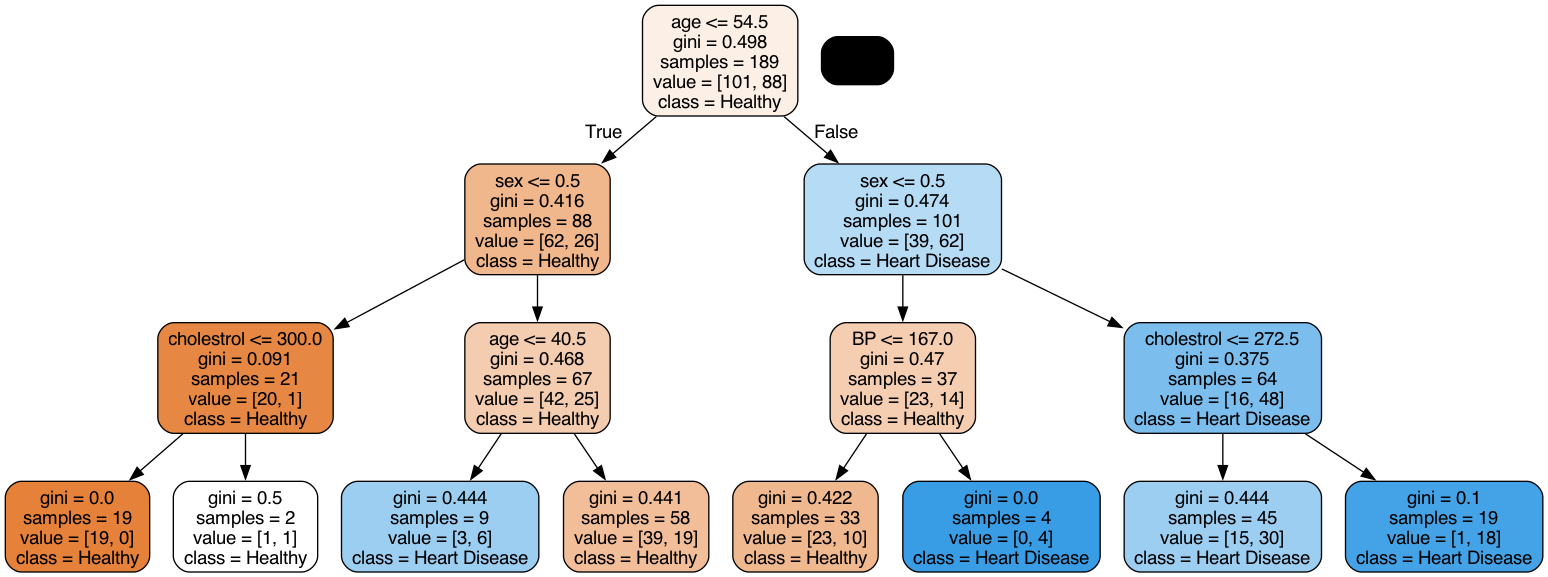

In [27]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [28]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [29]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

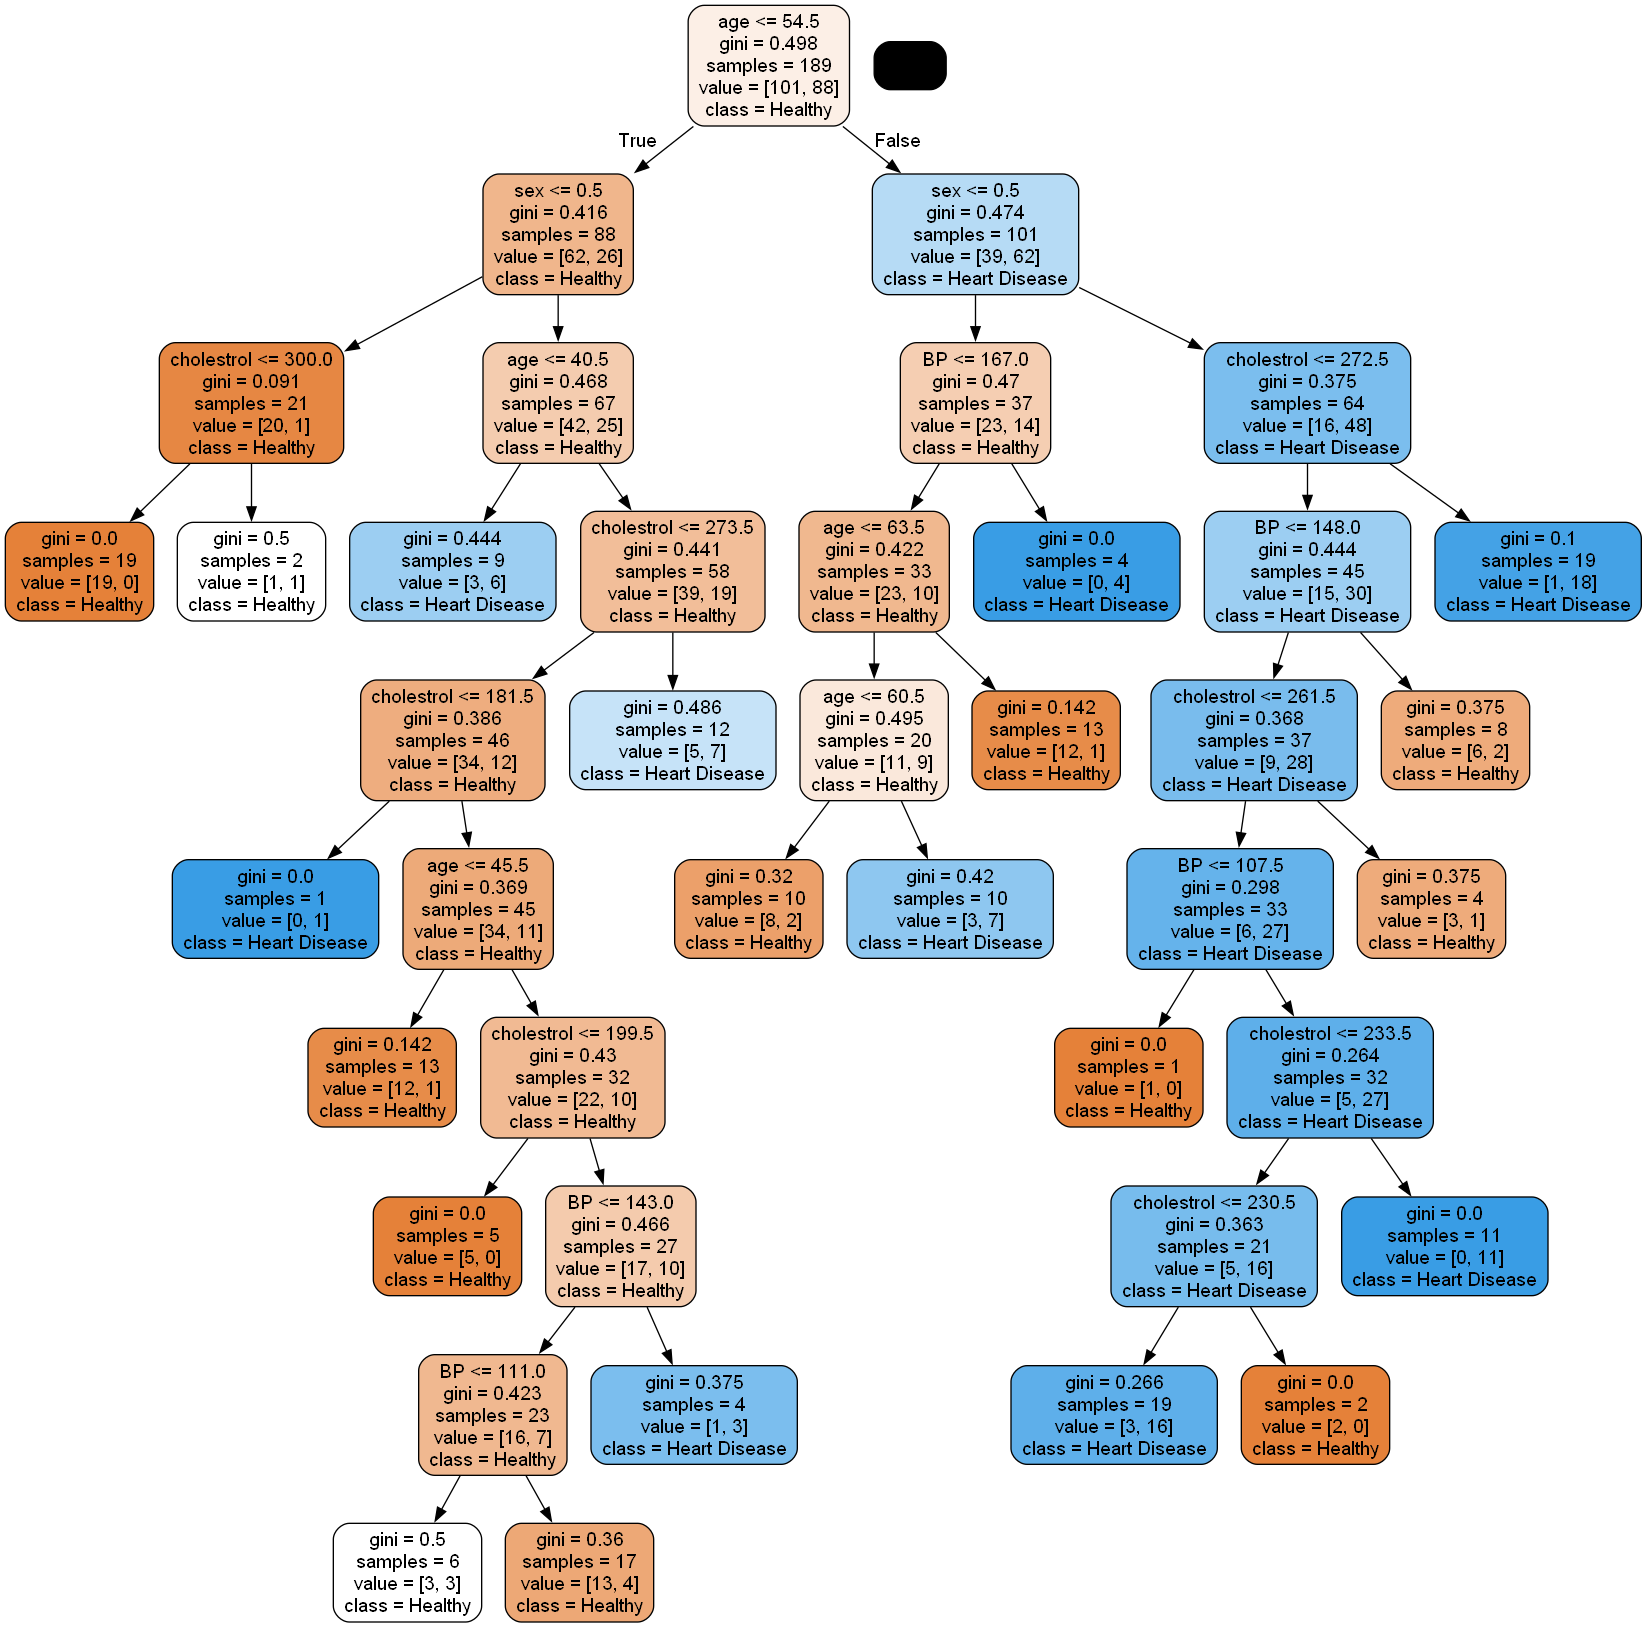

In [24]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [25]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [30]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

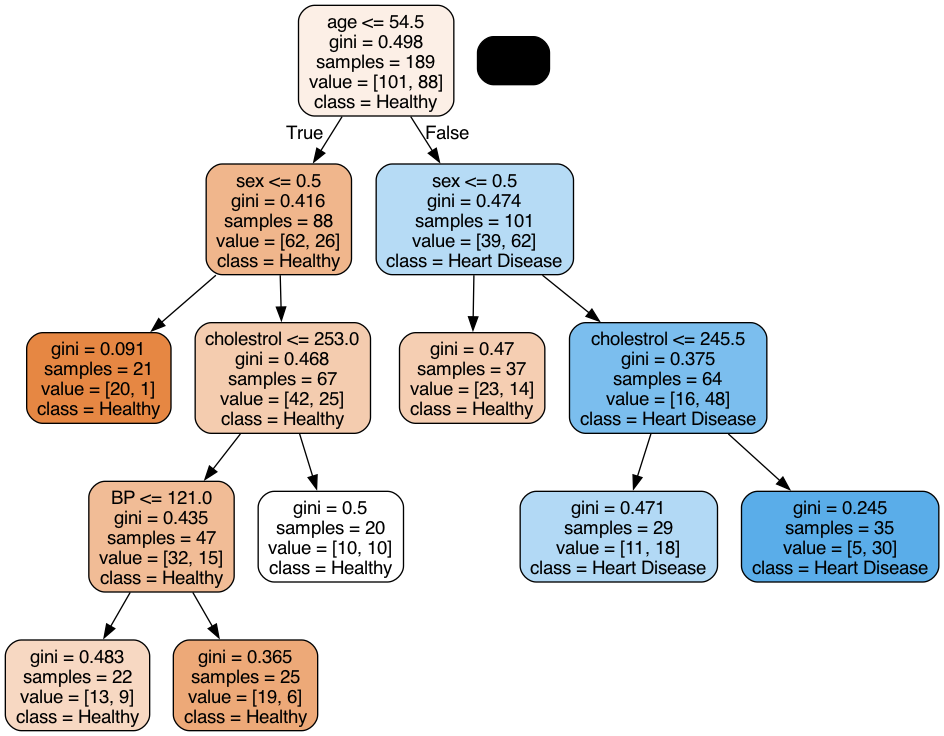

In [31]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [32]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [33]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

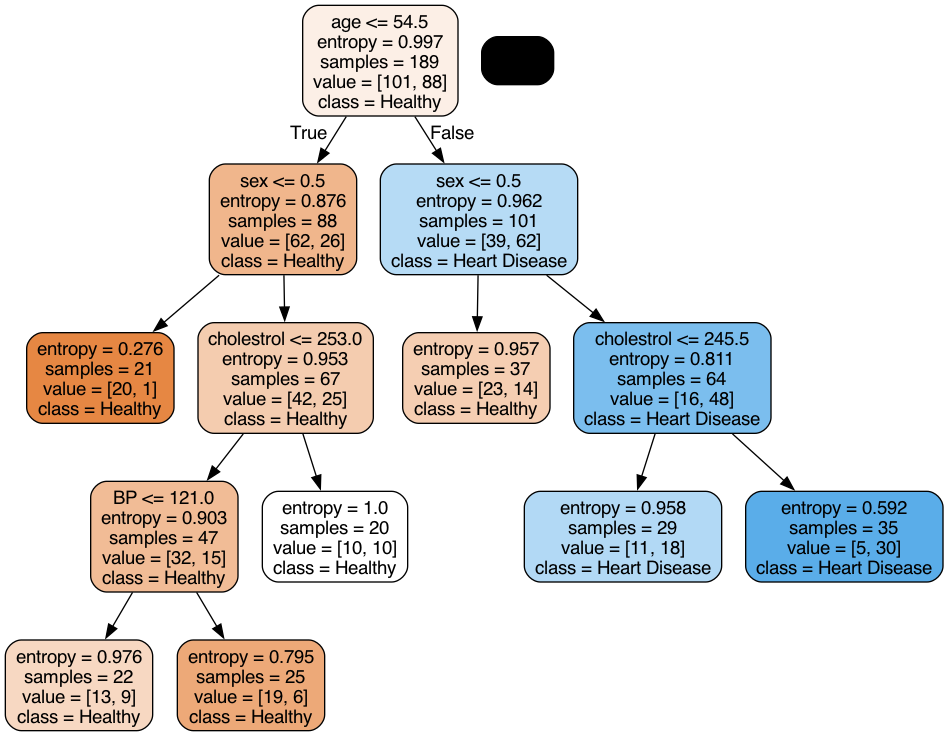

In [34]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [35]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [37]:
dt = DecisionTreeClassifier(random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


In [33]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [40]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [41]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 94.7 ms, sys: 66.2 ms, total: 161 ms
Wall time: 2.41 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [42]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003023,0.002063,0.001692,0.001644,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,18
1,0.001515,0.000354,0.000628,0.000047,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,18
2,0.000899,0.000170,0.000507,0.000050,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.001062,0.000539,0.000914,0.000452,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,8
4,0.001213,0.000662,0.000574,0.000132,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [43]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.000699,0.000057,0.000557,0.000229,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
6,0.000749,0.000095,0.000453,0.000028,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.645833,0.744681,0.595745,0.680851,0.666777,0.054202,2
31,0.000692,0.000075,0.000492,0.000130,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.625000,0.744681,0.595745,0.680851,0.661569,0.056898,3
5,0.001017,0.000429,0.000631,0.000287,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,4
11,0.000734,0.000050,0.000446,0.000016,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.645833,0.723404,0.595745,0.659574,0.656139,0.045525,5


In [44]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [45]:
dt_best = grid_search.best_estimator_

In [46]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



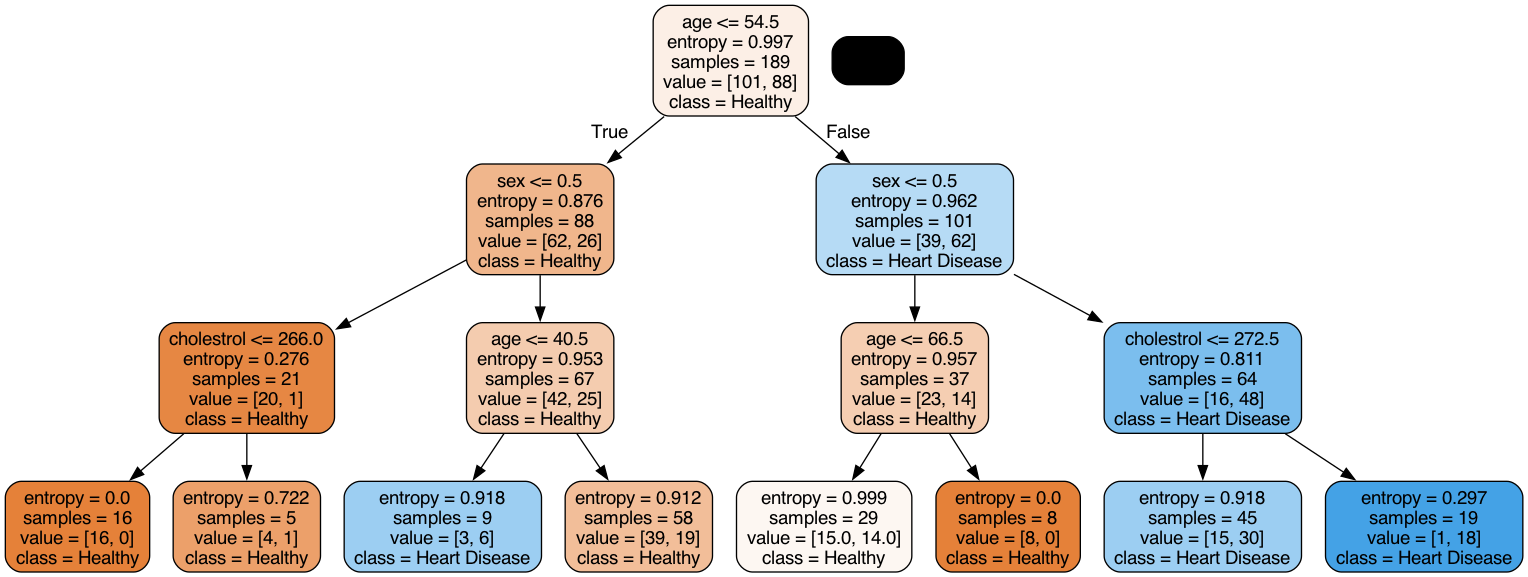

In [49]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())